In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Блок 1

Воспользовавшись [данными](https://www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs/code) и удобными для вас библиотеками для рисования/обработки датафреймов ответьте на список вопросов, аргументировав свою позицию.


1. Можно ли по данным датасета спотифай сказать, что музыкальные композиции с 90х годов стали сложнее или проще

2. Коррелирует ли характер тональности с темпом

3. (valence - Measures how positive a track sounds, from 1 to 0) - как коррелирует с характером(мажор/минор) тональности и коррелирует ли

4. Можно ли сказать, что за последнее время ключи тональностей (key) стали менее/более разнообразными

5. Какое совместное влияние оказывают факторы tempo, mode и loudness на показатель valence


## Общая информация про датасет

In [3]:
df = pd.read_csv('tracks_features.csv')
df.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')

**acousticness** - показатель уверенности от 0.0 до 1.0, является ли дорожка акустической (с минимальной обработкой звука). \
**explicit** - присутствие ненормативной лексики. \
**danceability** - насколько подходит для танцев; показатель основан на сочетании музыкальных элементов, включая темп, стабильность ритма, силу такта и общую регулярность. \
**duration_ms** - продолжительность в мс. \
**energy** - энергия, показывает, насколько музыка интенсивна и активна. Как правило, энергичные треки кажутся быстрыми, громкими и зашумленными. \
**instrumentalness** - предсказывает, не содержит ли трек вокала. Чем ближе значение инструментальности к 1.0, тем больше вероятность того, что трек не содержит вокала. \
**key** - ключ, в котором находится трек. Если ключа нет, то -1. \
**liveness** - определяет присутствие аудитории в записи (насколько вероятно, что трек записан вживую). \
**loudness** - общая громкость трека в дБ. Значение усреднено по всему треку. \
**mode** - указывает модальность трека (мажорную или минорную) трека. Мажор обозначается цифрой 1, а минор - 0. \
**speechiness** - определяет присутствие произносимых слов в треке. Чем больше запись похожа исключительно на речь (например, ток-шоу, аудиокнига, стихи), тем ближе к 1.0 значение атрибута. \
**tempo** - общий предполагаемый темп трека в ударах в минуту. В музыкальной терминологии tempo - это скорость или темп данного произведения, который напрямую зависит от средней продолжительности такта. \
**time_signature** - расчетная временная сигнатура. Временная сигнатура (метр) - это условное обозначение, определяющее, сколько ударов в каждом такте (или такте). Временная сигнатура варьируется от 3 до 7, указывая на временные сигнатуры от "3/4" до "7/4". \
**valence** - показатель от 0.0 до 1.0, описывающий музыкальную позитивность, передаваемую треком.

In [4]:
df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [5]:
df.shape

(1204025, 24)

## Вопрос 1
Можно ли по данным датасета спотифай сказать, что музыкальные композиции с 90х годов стали сложнее или проще?

In [4]:
# добавим новый столбец is_after_1990
df['is_after_1990'] = df['year'] >= 1990

Для ответа на вопрос проанализируем следующие показатели:
- danceability
- tempo
- energy
- duration_ms
- speechiness
- instrumentalness
- loudness

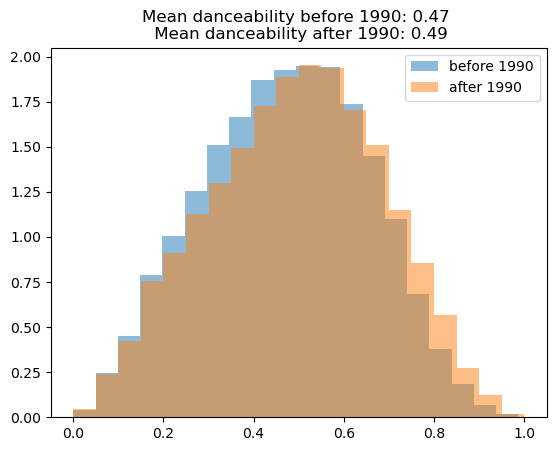

In [7]:
# посмотрим на распределение признака danceability - танцевальность музыки
plt.hist(df[~df['is_after_1990']]['danceability'], histtype='barstacked', bins=20, density=True, alpha=0.5, label='before 1990')
plt.hist(df[df['is_after_1990']]['danceability'], histtype='barstacked', bins=20, density=True, alpha=0.5, label='after 1990')
plt.legend()
plt.title(f"Mean danceability before 1990: {df[~df['is_after_1990']]['danceability'].mean():.2f} \n Mean danceability after 1990: {df[df['is_after_1990']]['danceability'].mean():.2f}");

Средняя танцевальность треков немного увеличилась. Доля более танцевальных треков среди всех треков в целом также выросла после 1990х годов.

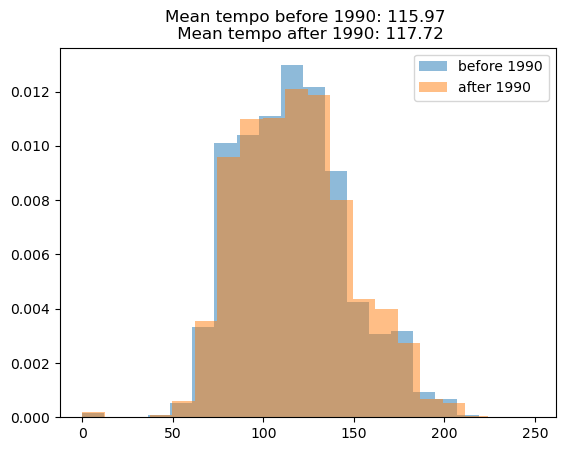

In [93]:
# посмотрим на распределение признака tempo - число ударов в минуту
plt.hist(df[~df['is_after_1990']]['tempo'], histtype='barstacked', bins=20, alpha=0.5, density=True, label='before 1990')
plt.hist(df[df['is_after_1990']]['tempo'], histtype='barstacked', bins=20, alpha=0.5, density=True, label='after 1990')
plt.legend()
plt.title(f"Mean tempo before 1990: {df[~df['is_after_1990']]['tempo'].mean():.2f} \n Mean tempo after 1990: {df[df['is_after_1990']]['tempo'].mean():.2f}");

Аналогично, темп треков немного увеличился. Доля треков с более быстрым темпом среди всех треков после 1990х годов выросла.

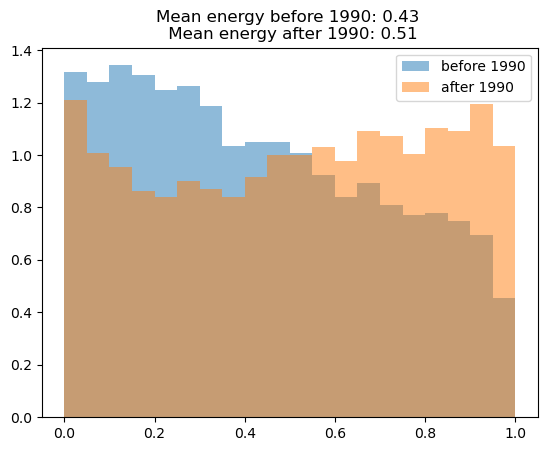

In [142]:
# посмотрим на распределение признака energy - интенсивность, энергичность музыки
plt.hist(df[~df['is_after_1990']]['energy'], histtype='barstacked', bins=20, density=True, alpha=0.5, label='before 1990')
plt.hist(df[df['is_after_1990']]['energy'], histtype='barstacked', bins=20, density=True, alpha=0.5, label='after 1990')
plt.legend()
plt.title(f"Mean energy before 1990: {df[~df['is_after_1990']]['energy'].mean():.2f} \n Mean energy after 1990: {df[df['is_after_1990']]['energy'].mean():.2f}");

Сильно изменился показатель энергичности музыки: после 1990х доля энергичных треков возросла. Напротив, до 1990х годов треки были в основном менее энергичные.

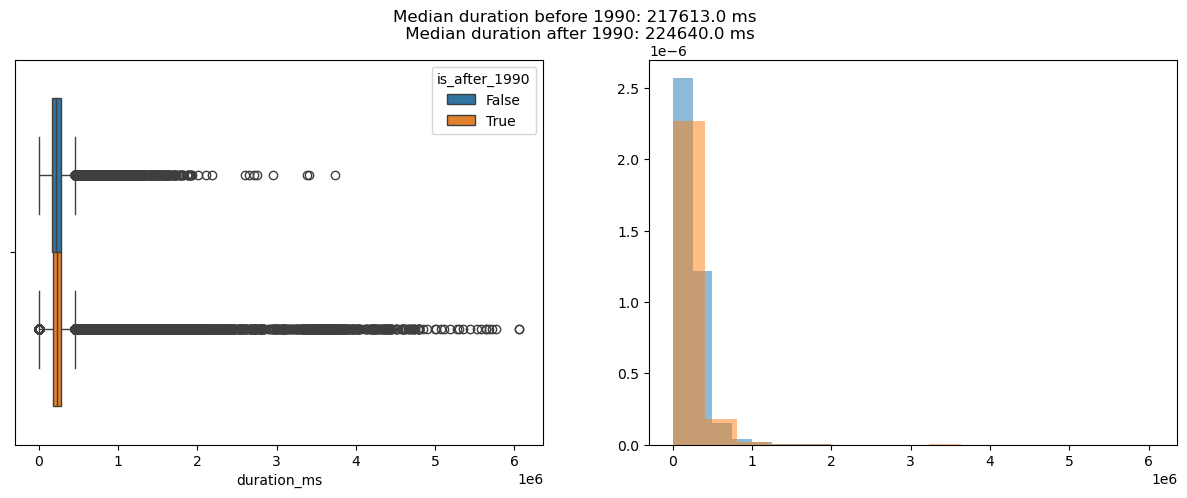

In [24]:
# посмотрим на распределение признака duration - длительность музыки в мс
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle(f"Median duration before 1990: {df[~df['is_after_1990']]['duration_ms'].median()} ms \n Median duration after 1990: {df[df['is_after_1990']]['duration_ms'].median()} ms")

sns.boxplot(df, x='duration_ms', hue='is_after_1990', ax=axes[0])

axes[1].hist(df[~df['is_after_1990']]['duration_ms'], histtype='barstacked', bins=15, alpha=0.5, density=True, label='before 1990')
axes[1].hist(df[df['is_after_1990']]['duration_ms'], histtype='barstacked', bins=15, alpha=0.5, density=True, label='after 1990');

Медианная продолжительность треков увеличилась примерно на 7 секунд. При этом после 1990х годов появились очень продолжительные треки (более 400 секунд).

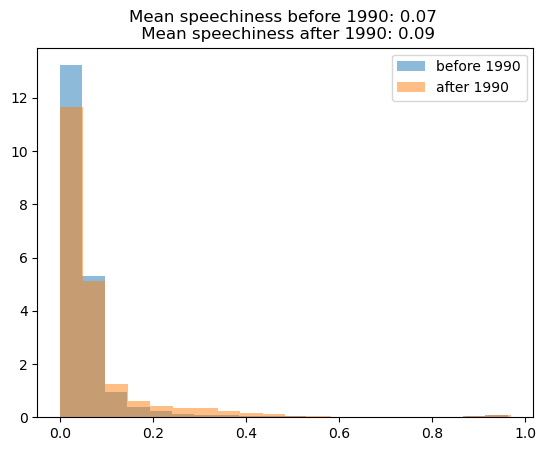

In [99]:
# посмотрим на признак speechiness - присутствие слов в треке
plt.hist(df[~df['is_after_1990']]['speechiness'], histtype='barstacked', bins=20, density=True, alpha=0.5, label='before 1990')
plt.hist(df[df['is_after_1990']]['speechiness'], histtype='barstacked', bins=20, density=True, alpha=0.5, label='after 1990')
plt.legend()
plt.title(f"Mean speechiness before 1990: {df[~df['is_after_1990']]['speechiness'].mean():.2f} \n Mean speechiness after 1990: {df[df['is_after_1990']]['speechiness'].mean():.2f}");

Немного увеличилось среднее значение показателя присутствия в музыке речи.

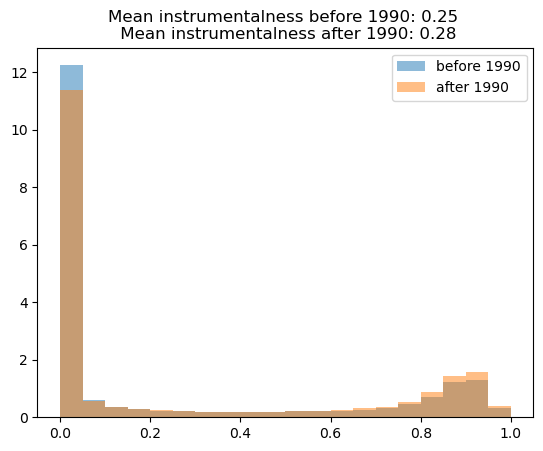

In [141]:
# посмотрим на признак instrumentalness - инструментальность музыки
plt.hist(df[~df['is_after_1990']]['instrumentalness'], histtype='barstacked', bins=20, density=True, alpha=0.5, label='before 1990')
plt.hist(df[df['is_after_1990']]['instrumentalness'], histtype='barstacked', bins=20, density=True, alpha=0.5, label='after 1990')
plt.legend()
plt.title(f"Mean instrumentalness before 1990: {df[~df['is_after_1990']]['instrumentalness'].mean():.2f} \n Mean instrumentalness after 1990: {df[df['is_after_1990']]['instrumentalness'].mean():.2f}");

Немного увеличилось среднее значение показателя инструментальности музыки.

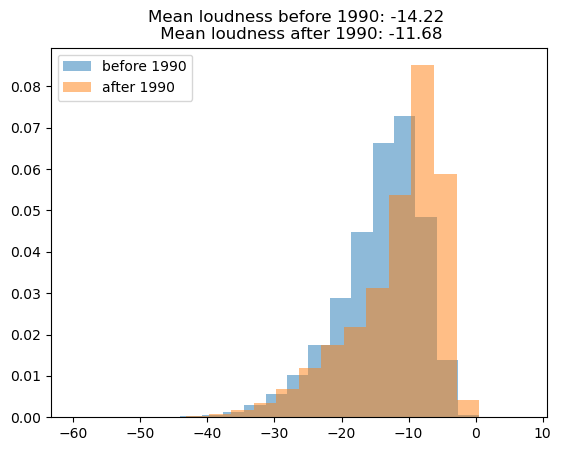

In [147]:
# посмотрим на признак loudness - громкость музыки
plt.hist(df[~df['is_after_1990']]['loudness'], histtype='barstacked', bins=20, density=True, alpha=0.5, label='before 1990')
plt.hist(df[df['is_after_1990']]['loudness'], histtype='barstacked', bins=20, density=True, alpha=0.5, label='after 1990')
plt.legend()
plt.title(f"Mean loudness before 1990: {df[~df['is_after_1990']]['loudness'].mean():.2f} \n Mean loudness after 1990: {df[df['is_after_1990']]['loudness'].mean():.2f}");

Видим сильные изменения по параметру громкости музыки: после 1990х треки стали громче.

**Выводы:**

В целом, нельзя однозначно ответить, стала ли музыка сложнее или проще. Можно проанализировать лишь отдельные показатели: музыка после 1990х годов стала громче, энергичнее, танцевальнее, появились нестандартные довольно длинные композиции. Думаю, можно сделать вывод о появлении новых жанров после 1990х годов и их развитии.

## Вопрос 2

Коррелирует ли характер тональности с темпом?

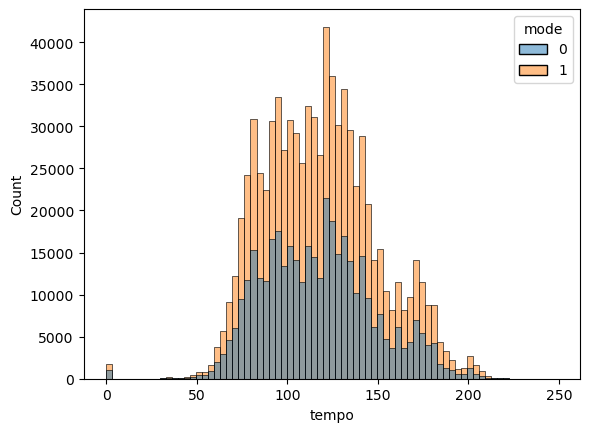

In [7]:
# построим гистограммы распределения признака tempo в зависимости от значения mode
sns.histplot(df, x='tempo', hue='mode', bins=75);

<AxesSubplot:xlabel='tempo'>

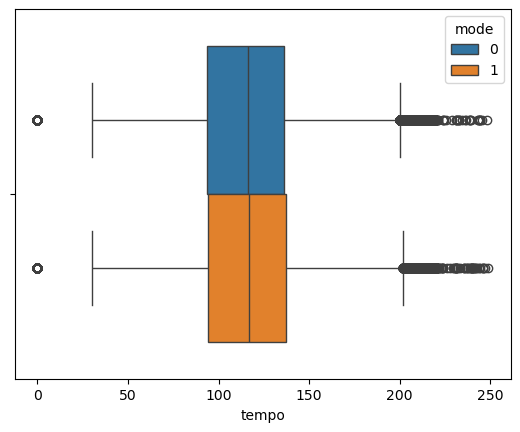

In [33]:
# построим бокс-плот
sns.boxplot(df, x='tempo', hue='mode')

In [24]:
import scipy.stats

# tempo - темп, mode - тональность
# рассчитаем коэффициент корреляции Спирмена
scipy.stats.spearmanr(df['mode'], df['tempo'])

SignificanceResult(statistic=0.012781187512705103, pvalue=1.0944384520221351e-44)

**Вывод:** Линейной зависимости нет.

## Вопрос 3
Как valence коррелирует с характером (мажор/минор) тональности и коррелирует ли?

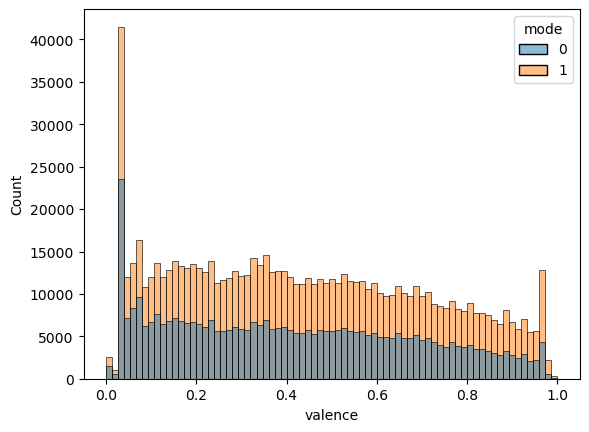

In [25]:
# построим гистограммы распределения признака valence в зависимости от значения mode
sns.histplot(df, x='valence', hue='mode', bins=75);

<AxesSubplot:xlabel='valence'>

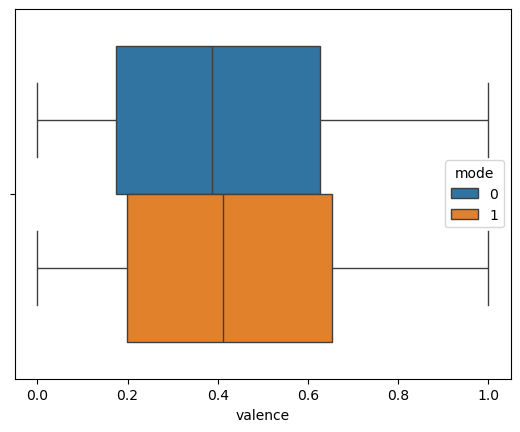

In [26]:
# построим бокс-плот
sns.boxplot(df, x='valence', hue='mode')

In [28]:
# valence - "позитивность" звучания, mode - тональность
# рассчитаем коэффициент корреляции Спирмена
scipy.stats.spearmanr(df['valence'], df['mode'])

SignificanceResult(statistic=0.0385388617548759, pvalue=0.0)

**Вывод:** Линейной зависимости нет.

## Вопрос 4
Можно ли сказать, что за последнее время ключи тональностей (key) стали менее/более разнообразными?

<AxesSubplot:xlabel='key', ylabel='count'>

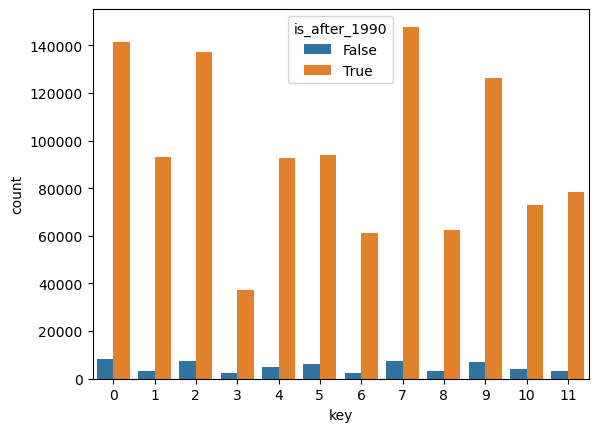

In [119]:
# построим countplot - как распределены ключи до и после 1990х годов
sns.countplot(df, x='key', hue='is_after_1990')

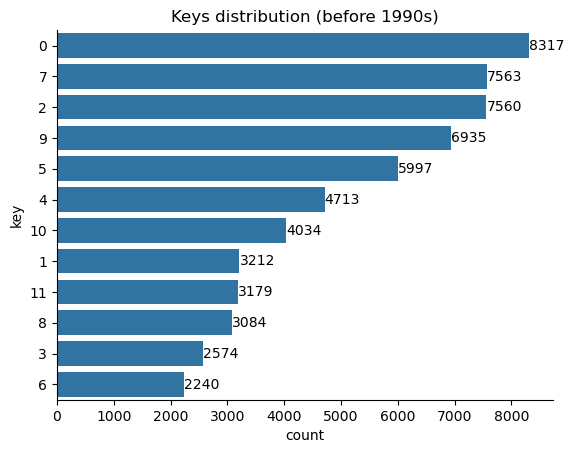

In [34]:
ax = sns.countplot(y=df[~df['is_after_1990']]['key'],
                   order=df[~df['is_after_1990']]['key'].value_counts(ascending=False).index);
abs_values = df[~df['is_after_1990']]['key'].value_counts(ascending=False).values
ax.set_title('Keys distribution (before 1990s)')
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.spines[['right', 'top']].set_visible(False);

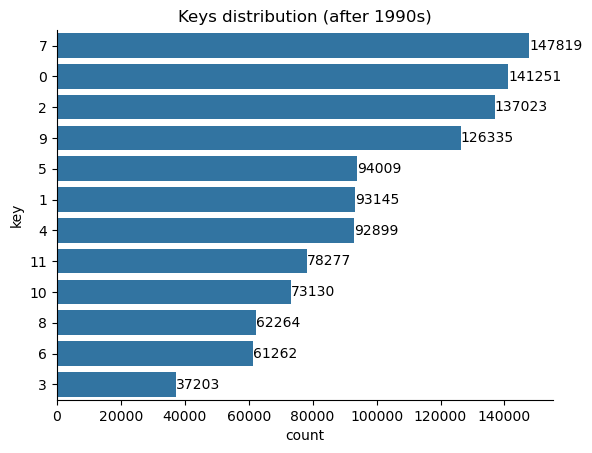

In [35]:
ax = sns.countplot(y=df[df['is_after_1990']]['key'],
                   order=df[df['is_after_1990']]['key'].value_counts(ascending=False).index,
                   orient='h');
abs_values = df[df['is_after_1990']]['key'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title('Keys distribution (after 1990s)')
ax.spines[['right', 'top']].set_visible(False);

**Выводы:** 

- Ключи не сталии более или менее разнообразными. Со временем после начала 90х годов поменялись лишь частоты встречаемости у некоторых ключей. \
- Самые часто встречающиеся ключи и до, и после 1990х - 0, 2, 7 (со временем поменялся лишь порядок). \
- Наименее используемые ключи и до, и после 1990х - 3, 6, 8 (со временем также поменялся только порядок).

## Вопрос 5
Какое совместное влияние оказывают факторы tempo, mode и loudness на показатель valence?

In [30]:
# обучим линейную регрессию, используя показатели tempo, mode и loudness, для предсказания показателя valence

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['tempo', 'mode', 'loudness']]
y = df['valence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
model.coef_, model.intercept_

(array([0.00074782, 0.02160666, 0.01410267]), 0.4919274106044014)

In [38]:
model.score(X_test, y_test)

0.15663321755668336

**Выводы:** 
- tempo почти не вносит вклад в значение valence
- mode и loudness вносят небольшой вклад в значение valence
- valence = 0.00075 * tempo + 0.02161 * mode + 0.0141 * loudness + 0.49193

# Блок 2

Воспользовавшись данными с сайта о продаже музыкальных инструментов и удобными для вас библиотеками для рисования/обработки датафреймов ответьте на список вопросов, аргументировав свою позицию.


1. Какие факторы влияют на цену инструмента и как?

2. Можно ли разделить объявления на какие-то явно разделяющиеся по некоторому принципу категории: винтаж/ширпотреб/мастеровое и тд

## Общая информация про датасет

In [2]:
df = pd.read_csv('reverb_aggregated.csv')
print('Size of dataset:', df.shape)
print('Columns:', df.columns)

df.head()

Size of dataset: (31920, 6)
Columns: Index(['title', 'description', 'text', 'param_dict', 'price', 'listing_id'], dtype='object')


,title,description,text,param_dict,price,listing_id
0,Fender American Standard Stratocaster [XIX19] ...,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,"$1,131.92",cbbfd652-ca5f-11ed-8644-acde48001122
1,"Fender ""American Vintage II 1951 Telecaster"" 3...",The Fender® American Vintage II series present...,The Fender® American Vintage II series present...,{'Condition': 'Brand New (New)Brand New items ...,"$1,935.55",cd998c16-ca5f-11ed-8644-acde48001122
2,Rebel Custom Guitars Funky Claude 2022 - Hydro...,Stratocaster Style Custom Guitar by Rebel Cust...,Stratocaster Style Custom Guitar by Rebel Cust...,{'Condition': 'Brand New (New)Brand New items ...,"$1,055.53",cfe6936a-ca5f-11ed-8644-acde48001122
3,Fender AMERICAN PROFESSIONAL Stratocaster [MJ8...,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,"$1,290.62",d1e90396-ca5f-11ed-8644-acde48001122
4,G&L S-500 Premium C.F.S [MJ724] | Reverb,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,$575.55,d3f30786-ca5f-11ed-8644-acde48001122


## Выделение признаков из колонки param_dict

In [3]:
import ast

# конвертируем все значения колонки param_dict из строки в словарь и сохраним в переменную data
data = df['param_dict'].map(lambda x: ast.literal_eval(x))

# преобразуем объект из Series в list
data = data.to_list()

# создадим отдельный датафрейм с извлеченными параметрами
param_df = pd.DataFrame(data)
print(param_df.shape)
param_df.head()

(31920, 33)


,Condition,Brand,Model,Categories,Year,Fretboard Material,Pickup Configuration,Color Family,Right / Left Handed,Body Shape,...,Neck Construction,Number of Frets,Made In,Finish,Product Family,Artist,Frets,Top Material,Finish Features,Model Sub-Family
0,Very Good (Used)Very Good items may show a few...,Fender,American Standard Stratocaster with Rosewood F...,Solid Body,2008,Rosewood,SSS,White,Right Handed,S-Style,...,Bolt-On,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brand New (New)Brand New items are sold by an ...,Fender,"""American Vintage II 1951 Telecaster"" HARDCASE...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brand New (New)Brand New items are sold by an ...,Rebel Custom Guitars,Funky Claude,Solid Body,2022,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Australia,"Hydro Graphic Film, 2k Clear Coat, Natural Nec...",NaN,NaN,NaN,NaN,NaN,NaN
3,Very Good (Used)Very Good items may show a few...,Fender,American Professional Stratocaster with Rosewo...,Solid Body,2017,Rosewood,SSS,Red,Right Handed,S-Style,...,Bolt-On,22,NaN,NaN,Fender Stratocaster,NaN,NaN,NaN,NaN,NaN
4,Very Good (Used)Very Good items may show a few...,G&L,S-500 Premium C.F.S [MJ724],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# посмотрим на количество пропусков
param_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31920 entries, 0 to 31919
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Condition              31920 non-null  object
 1   Brand                  31920 non-null  object
 2   Model                  31920 non-null  object
 3   Categories             23991 non-null  object
 4   Year                   19030 non-null  object
 5   Fretboard Material     11901 non-null  object
 6   Pickup Configuration   11348 non-null  object
 7   Color Family           7524 non-null   object
 8   Right / Left Handed    18929 non-null  object
 9   Body Shape             16140 non-null  object
 10  Number of Strings      15118 non-null  object
 11  Fretboard Radius       5214 non-null   object
 12  Neck Material          10870 non-null  object
 13  Offset Body            8388 non-null   object
 14  Finish Style           8831 non-null   object
 15  Body Type          

- Condition - состояние гитары
- Brand - бренд, производитель
- Made In - страна производства
- Model - модель гитары
- Model Family - семейство (серия) модели
- Model Sub-Family - подсемейство модели
- Product Family - семейство изделия
- Categories - категория, тип гитары, особенности
- Year - год
- Fretboard Material - материал грифа (части с ладами)
- Fretboard Radius - радиус грифа в дюймах
- Nut Width - ширина грифа
- Neck Material - материал грифа (всего грифа, задней части)
- Neck Construction - конструкция грифа
- Scale Length - длина шкалы (длина вибрирующей части струны)
- Number of Frets - количество ладов
- Pickup Configuration - конфигурация звукоснимателя
- Right / Left Handed - для правшей / левшей
- Body Shape - форма корпуса
- Body Type - тип корпуса
- Body Material - материал корпуса
- Offset Body - асимметричная форма корпуса
- Wood Top Style - стиль деки
- Top Material - материал деки
- Number of Strings - количество струн
- Color Family - цвет
- Finish Style - стиль отделки
- Finish Features - особенности отделки
- Finish - отделка
- Series - серии
- Bridge / Tailpiece Type - тип моста (порожка) / хвостовой части
- Artist - какому артисту принадлежала
- Frets - лады

In [4]:
# преобразуем некоторые колонки в численные значения
param_df['Number of Frets'] = pd.to_numeric(param_df['Number of Frets'])
param_df['Number of Strings'] = pd.to_numeric(param_df['Number of Strings'].map(lambda s: s.replace('-String', '') if s is not np.nan else s))

In [5]:
# сольем с основным датафреймом и преобразуем цену в число
df = pd.concat([df, param_df], axis=1)

# преобразуем price в численный тип
df['price'] = pd.to_numeric(df['price'].map(lambda s: s.replace('$', '').replace(',', '')))

# преобразуем колонку с признаком Condition, оставив короткое описание
df['Condition'] = df['Condition'].map(lambda s: s.split(' (')[0])

df.head(3)

,title,description,text,param_dict,price,listing_id,Condition,Brand,Model,Categories,...,Neck Construction,Number of Frets,Made In,Finish,Product Family,Artist,Frets,Top Material,Finish Features,Model Sub-Family
0,Fender American Standard Stratocaster [XIX19] ...,Welcome to Qsic's Reverb Shop!1. The descripti...,Welcome to Qsic's Reverb Shop!1. The descripti...,{'Condition': 'Very Good (Used)Very Good items...,1131.92,cbbfd652-ca5f-11ed-8644-acde48001122,Very Good,Fender,American Standard Stratocaster with Rosewood F...,Solid Body,...,Bolt-On,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Fender ""American Vintage II 1951 Telecaster"" 3...",The Fender® American Vintage II series present...,The Fender® American Vintage II series present...,{'Condition': 'Brand New (New)Brand New items ...,1935.55,cd998c16-ca5f-11ed-8644-acde48001122,Brand New,Fender,"""American Vintage II 1951 Telecaster"" HARDCASE...",NaN,...,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rebel Custom Guitars Funky Claude 2022 - Hydro...,Stratocaster Style Custom Guitar by Rebel Cust...,Stratocaster Style Custom Guitar by Rebel Cust...,{'Condition': 'Brand New (New)Brand New items ...,1055.53,cfe6936a-ca5f-11ed-8644-acde48001122,Brand New,Rebel Custom Guitars,Funky Claude,Solid Body,...,NaN,NaN,Australia,"Hydro Graphic Film, 2k Clear Coat, Natural Nec...",NaN,NaN,NaN,NaN,NaN,NaN


## Вопрос 1
Какие факторы влияют на цену инструмента и как?

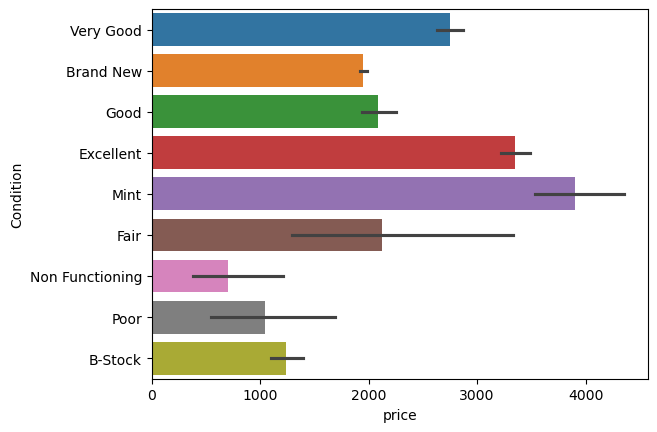

In [13]:
# зависимость цены гитары от ее состояния
sns.barplot(df, y='Condition', x='price', hue='Condition');

Цены на гитары сильно зависят от состояния инструмента: ожидаемо, гитары в хорошем состоянии стоят дороже тех, что в плохом. Интересно, что новые изделия (Brand New) стоят дешевле гитар, находившихся до этого в чьем-то пользовании.

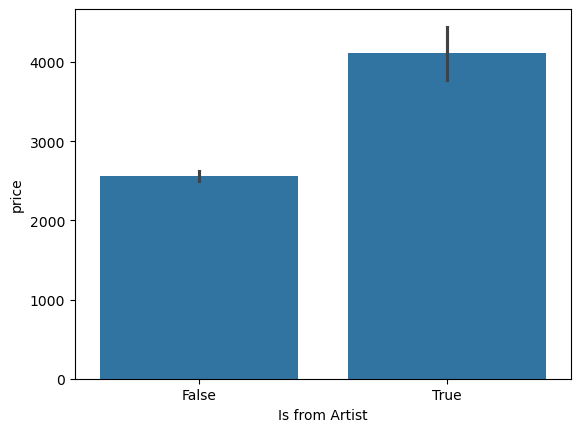

In [32]:
# добавим признак, обозначающий, принадлежала ли артисту / использовалась им
df['Is from Artist'] = ~df['Artist'].isna()
sns.barplot(df, x='Is from Artist', y='price');

Видим, что если была указана принадлежность артисту, то цена на гитару в среднем выше.

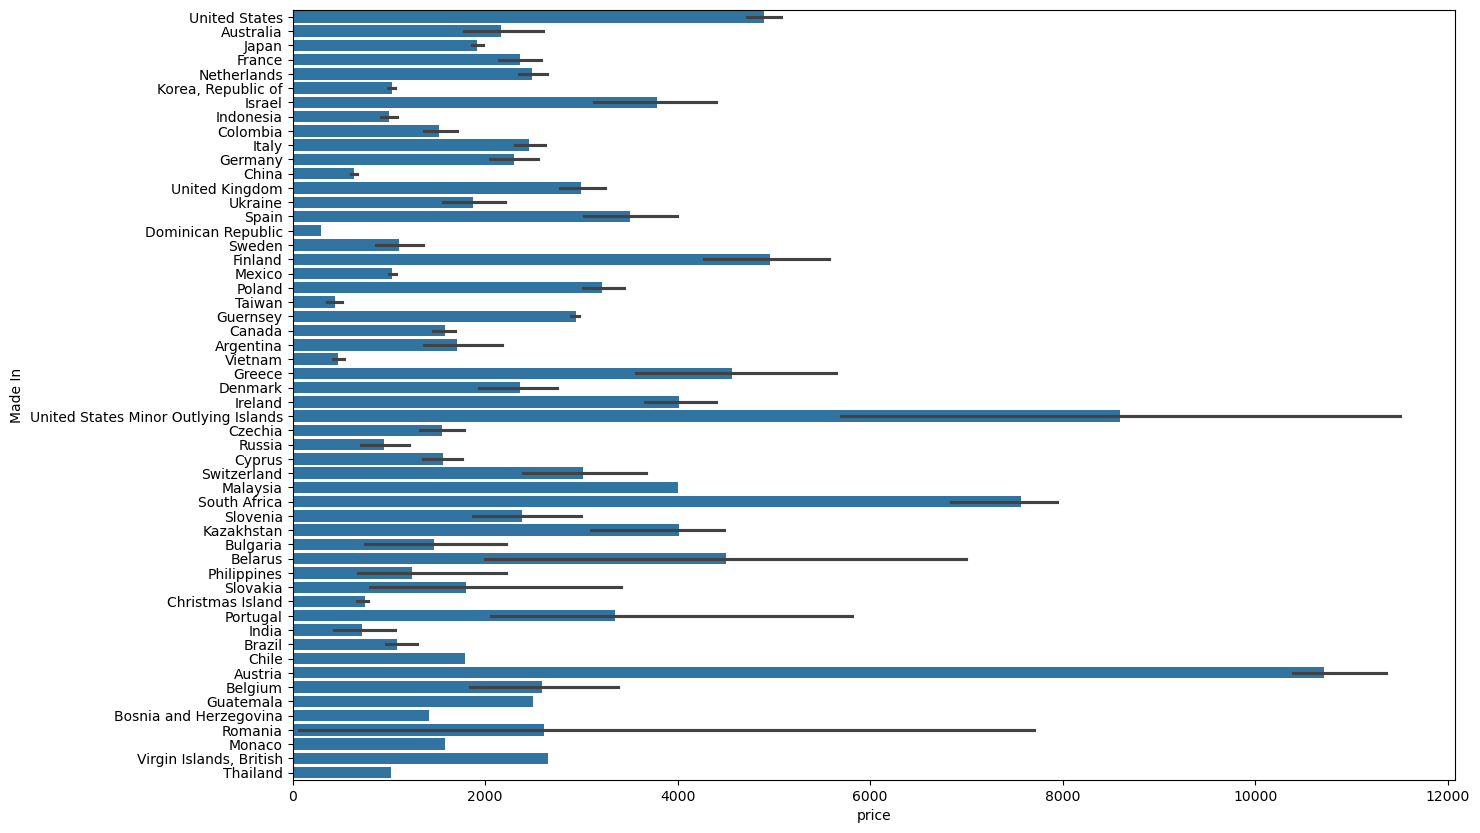

In [26]:
# зависимость цены гитары от страны производства
plt.figure(figsize=(15, 10))
sns.barplot(df, y='Made In', x='price');

Наиболее высокие средние цены наблюдаются у гитар, произведенных в США, Южной Африке, странах Европы.

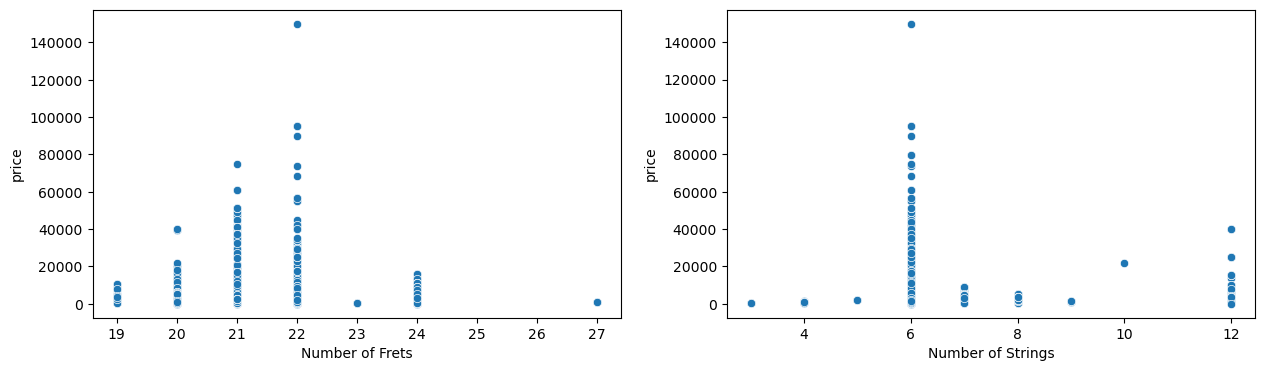

In [53]:
# зависимость от числа струн и ладов
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
sns.scatterplot(df, x='Number of Frets', y='price', ax=axes[0])
sns.scatterplot(df, x='Number of Strings', y='price', ax=axes[1]);

Самое популярное количество ладов - 20, 21 и 22, среди таких гитар наблюдается большой разброс по цене. Самое ходовое число струн - 6, здесь ситуация аналогична, разброс большой и итоговая цена скорее всего определяется другим набором характеристик.

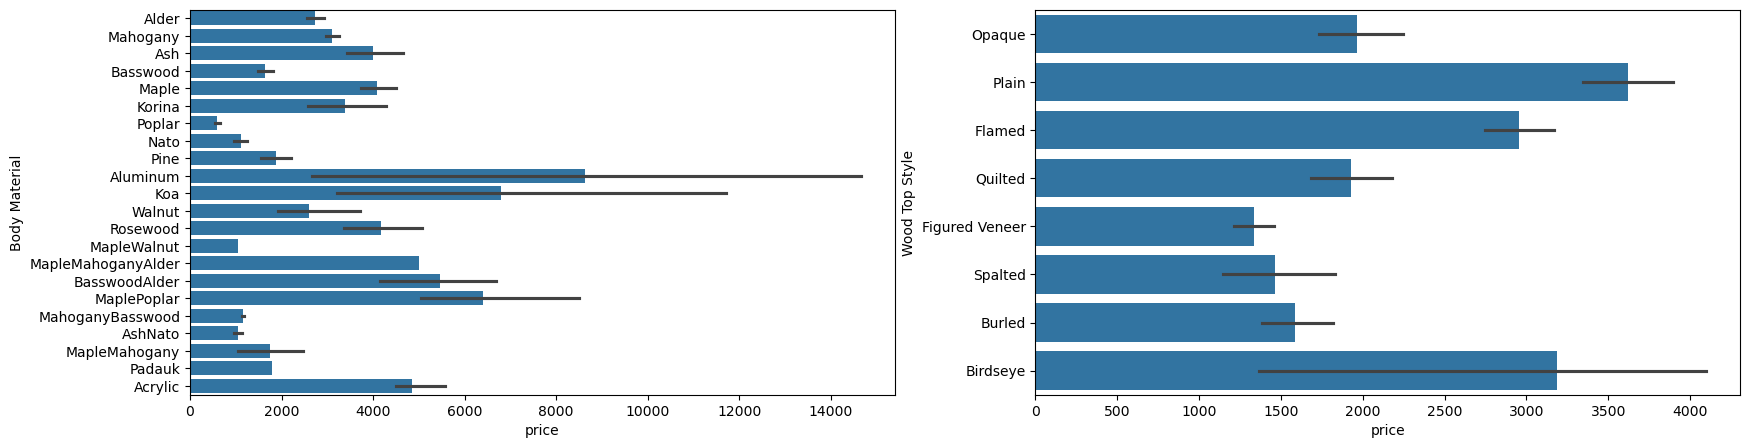

In [52]:
# зависимость цены от материалов и стиля корпуса
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(df, y='Body Material', x='price', ax=axes[0])
sns.barplot(df, y='Wood Top Style', x='price', ax=axes[1]);

Видим, что материал корпуса гитары влияет на среднюю цену: разные виды дерева влияют на качество извлекаемого звука, что в свою очередь влечет различия в стоимости инструмента. Также существует некое влияние стиля деки на цену.

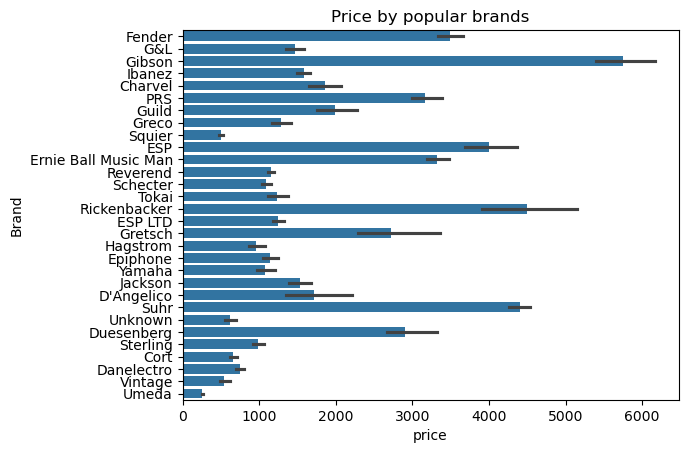

In [86]:
# возьмем 30 самых популярных брендов и посмотрим на зависимость цены
popular_brands = df['Brand'].value_counts().sort_values(ascending=False)[:30].index
sns.barplot(df[df['Brand'].isin(popular_brands)], y='Brand', x='price')
plt.title('Price by popular brands');

Явно выбиваются по стоимости гитары от Fender, Gibson, ESP, Rickenbacker, Suhr, Ernie Ball Music Man, PRS, Duesenberg, Gretsch.

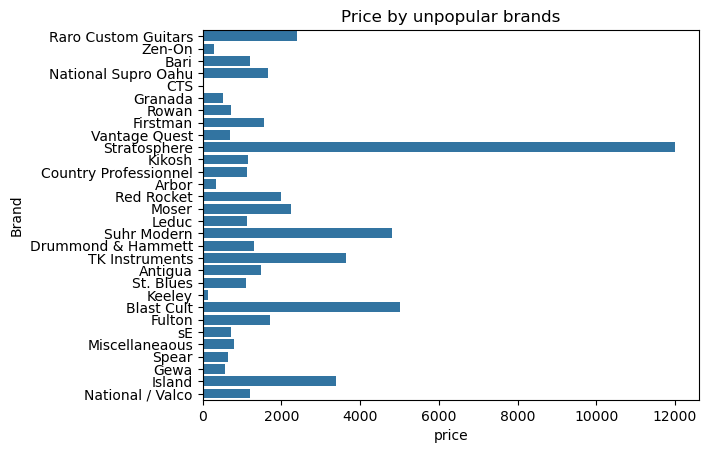

In [89]:
# и 30 самых редких брендов и посмотрим на зависимость цены
popular_brands = df['Brand'].value_counts().sort_values()[:30].index
sns.barplot(df[df['Brand'].isin(popular_brands)], y='Brand', x='price')
plt.title('Price by unpopular brands');

В этой категории большинство цен в пределах до 2000-2500$, но есть и те бренды, за гитары от которых цены выше: Stratosphere, Blast Cult, Suhr Modern, TK Instruments, Island.

**Общие выводы**: среди главных факторов, влияющих на цену, можно отметить состояние гитары, страну производства, бренд, материал изготовления.


## Вопрос 2
Можно ли разделить объявления на какие-то явно разделяющиеся по некоторому принципу категории: винтаж/ширпотреб/мастеровое и тд

In [6]:
# попробуем проанализировать цены по годам

import re
df['Year'] = df['Year'].map(lambda s: re.sub('[~()s‘’]', '', s.strip()) if s is not np.nan else s)

# временные промежутки, выраженные не конкретным годом, а строкой, будем считать за NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
years = df['Year'].value_counts().index

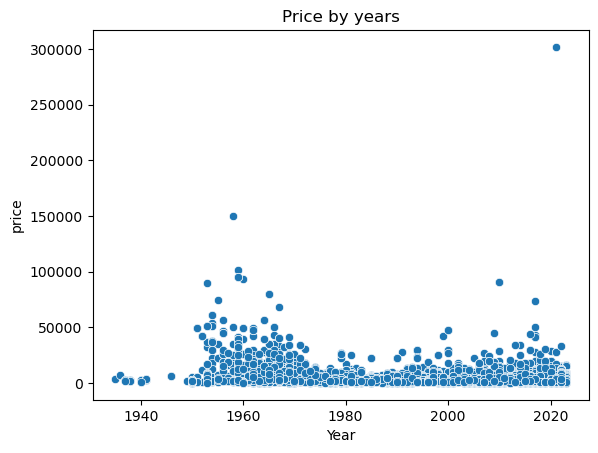

In [16]:
# построим точечный график (на нем не учитываются аномально распарщенные значения годов)
sns.scatterplot(df[(df['Year'].isin(years)) & (df['Year'] < 2500) & (df['Year'] > 1900)], x='Year', y='price')
plt.title('Price by years');

Видим область объявлений о гитарах, год изготовления которых лежит между 1950-1980 годами, при этом цена сильно колеблется и достигает высоких значений. Думаю, эти объявления можно отнести к категории "Винтаж" по принципу год выпуска-цена. 